In [31]:
# Cella 1: Reset, Clone e Configurazione Ambiente

import os
import sys

# 1. --- RESET AMBIENTE ---
# Torna alla directory di base di Colab (/content/) e rimuovi il repository
# Questo previene problemi di annidamento e path errati.
print("Esecuzione Reset Ambiente...")
try:
    os.chdir('/content/')
    # Rimuovi la cartella clonata se esiste, per evitare annidamenti al prossimo clone
    !rm -rf Hawk-AI-CV-Project
except Exception as e:
    print(f"Errore durante il reset: {e}. Continuo...")

# 2. --- CLONAZIONE ---
# Clona il tuo repository nella cartella /content/
!git clone https://github.com/leonardoCosta02/Hawk-AI-CV-Project.git

# 3. --- CAMBIO DIRECTORY (CD) E PATH ---
repo_name = "Hawk-AI-CV-Project"
# Spostati nella root del tuo progetto
%cd $repo_name

# Aggiungi la directory corrente (la radice del repo) al PATH di Python
sys.path.insert(0, os.getcwd())

# 4. --- INSTALLAZIONE LIBRERIE ---
print("Installazione librerie necessarie...")
# Usiamo i comandi standard per garantire l'ambiente
!pip install numpy opencv-python matplotlib

print("\nSetup completato. Ora la tua root è:")
print(os.getcwd())

Esecuzione Reset Ambiente...
Cloning into 'Hawk-AI-CV-Project'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 72 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (72/72), 680.50 KiB | 4.12 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/Hawk-AI-CV-Project
Installazione librerie necessarie...

Setup completato. Ora la tua root è:
/content/Hawk-AI-CV-Project


In [32]:
# --- IMPORTAZIONE DEI MODULI ---
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# CORREZIONE: Importa config come modulo DA src (risolvendo l'ambiguità)
from src import config
from src.court_features import trova_linee

# --- 1. PREPARAZIONE DATI ---
# Usa la mappa ALL_SURFACE_PARAMS in config.py
immagini_caricate = {}

print("Caricamento frame per le 3 superfici...")

# Modifica cruciale: 'params_dict' ora contiene il dizionario di tutti i parametri
for superficie, params_dict in config.ALL_SURFACE_PARAMS.items():

    # 1. Estrai il percorso corretto dalla chiave 'FRAME_PATH'
    path = params_dict['FRAME_PATH']

    # 2. Continua con il caricamento
    image_bgr = cv.imread(path)

    if image_bgr is None:
        print(f"ERRORE: Impossibile caricare l'immagine da {path}. Controlla i file in data/!")
        print(f"ATTENZIONE: Se hai clonato il repo, i file devono essere in {os.getcwd()}/data/static_images/.")
    else:
        # Carica in BGR (per processing) e RGB (per visualizzazione)
        immagini_caricate[superficie] = {
            'bgr': image_bgr,
            'rgb': cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)
        }

if not immagini_caricate:
    print("Nessun frame caricato. Termino l'esecuzione.")
else:
    print(f"Caricamento completato per {len(immagini_caricate)} tipi di campo.")

Caricamento frame per le 3 superfici...
ERRORE: Impossibile caricare l'immagine da data/static_court_frame_cemento.jpg. Controlla i file in data/!
ATTENZIONE: Se hai clonato il repo, i file devono essere in /content/Hawk-AI-CV-Project/data/static_images/.
ERRORE: Impossibile caricare l'immagine da data/static_court_frame_erba.jpg. Controlla i file in data/!
ATTENZIONE: Se hai clonato il repo, i file devono essere in /content/Hawk-AI-CV-Project/data/static_images/.
ERRORE: Impossibile caricare l'immagine da data/static_court_frame_clay.jpg. Controlla i file in data/!
ATTENZIONE: Se hai clonato il repo, i file devono essere in /content/Hawk-AI-CV-Project/data/static_images/.
Nessun frame caricato. Termino l'esecuzione.



== TUNING ATTUALE PER SUPERFICIE: CEMENTO ==


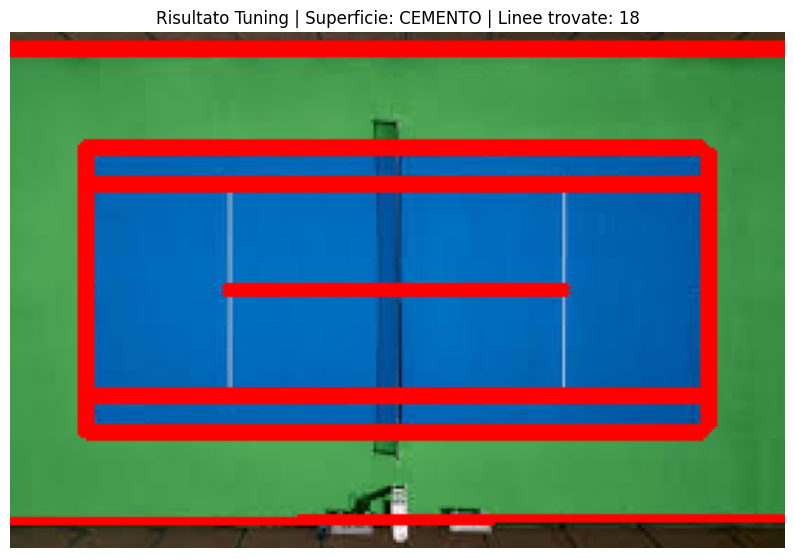


== TUNING ATTUALE PER SUPERFICIE: ERBA ==


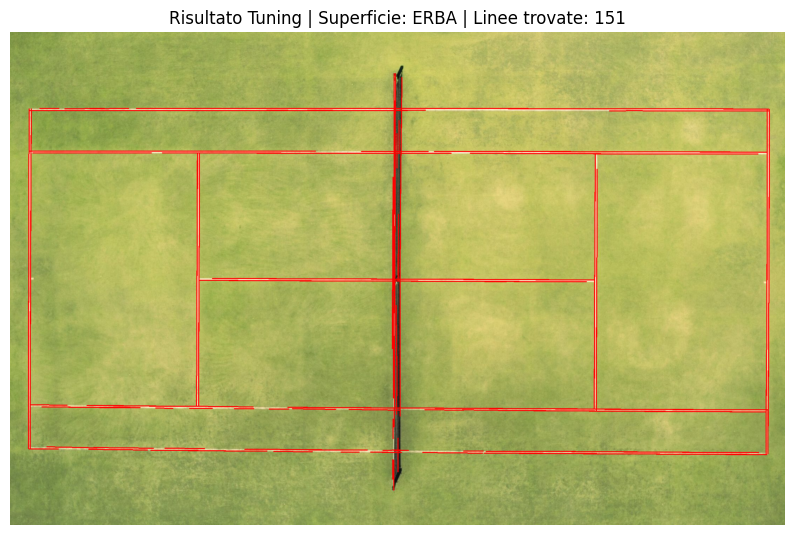


== TUNING ATTUALE PER SUPERFICIE: TERRA_BATTUTA ==


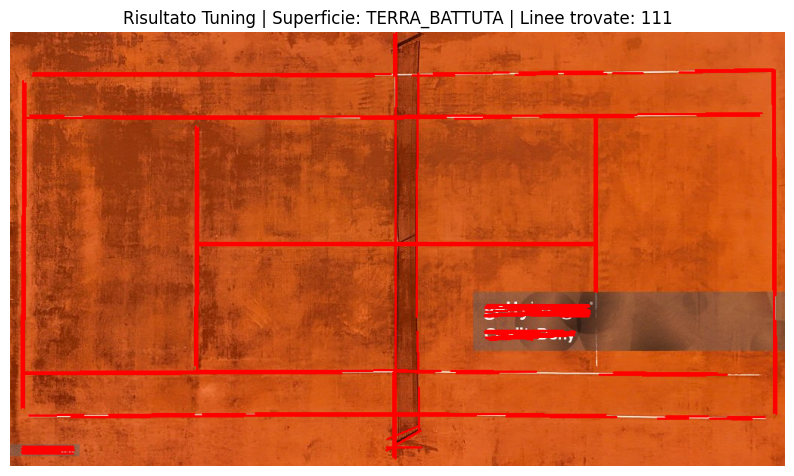


======================= RIEPILOGO PARAMETRI FINALI PER config.py =======================
Questi set di parametri sono l'output del tuo lavoro per il Membro 3.

# CONFIGURAZIONE LINEE OTTIMALI PER SUPERFICIE

PARAMS_CEMENTO: {
    'CANNY_LOW': 25,
    'CANNY_HIGH': 100,
    'HOUGH_THRESHOLD': 70,
    # Linee Trovate: 18
}

PARAMS_ERBA: {
    'CANNY_LOW': 30,
    'CANNY_HIGH': 120,
    'HOUGH_THRESHOLD': 60,
    # Linee Trovate: 151
}

PARAMS_TERRA_BATTUTA: {
    'CANNY_LOW': 40,
    'CANNY_HIGH': 180,
    'HOUGH_THRESHOLD': 30,
    # Linee Trovate: 111
}


In [9]:
# --- 1. LOOP DI TUNING PER OGNI SUPERFICIE ---

risultati_finali = {}

for superficie, dati_immagine in immagini_caricate.items():

    # Recupera i parametri dal file di configurazione
    params = config.ALL_SURFACE_PARAMS[superficie]

    print(f"\n========================================================")
    print(f"== TEST SUPERFICIE: {superficie} ==")
    print(f"   Parametri CANNY usati: LOW={params['CANNY_LOW']}, HIGH={params['CANNY_HIGH']}")
    print(f"   Soglia HOUGH usata: {params['HOUGH_THRESHOLD']}")
    print(f"========================================================")

    # --- ESECUZIONE DELLA TUA FUNZIONE ---
    # Notare che passiamo solo l'immagine e il tipo di superficie (Clean Code!)
    raw_line_segments = trova_linee(dati_immagine['bgr'], superficie)

    # --- 2. VISUALIZZAZIONE DEI RISULTATI ---
    line_frame = np.copy(dati_immagine['rgb'])
    linee_trovate = len(raw_line_segments)

    if linee_trovate > 0:
        for x1, y1, x2, y2 in raw_line_segments:
            # Disegna la linea in ROSSO
            cv.line(line_frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Visualizza
    plt.figure(figsize=(10, 8))
    plt.imshow(line_frame)
    plt.title(f"Risultato: {superficie} | Linee trovate: {linee_trovate}")
    plt.axis('off')
    plt.show()

    # 3. Registra i risultati
    risultati_finali[superficie] = {
        'Canny Low': params['CANNY_LOW'],
        'Canny High': params['CANNY_HIGH'],
        'Hough Threshold': params['HOUGH_THRESHOLD'],
        'Totale Linee Trovate': linee_trovate
    }

# --- RIEPILOGO FINALE ---
print("\n======================= RIEPILOGO COMPLETO =======================")
print("Risultati ottenuti con i parametri attualmente definiti in config.py:")
for superficie, params in risultati_finali.items():
    print(f"\nSUPERFICIE: {superficie}")
    print(f"  -> Linee Trovate: {params['Totale Linee Trovate']}")
    print(f"  -> Canny/Hough Usati: {params['Canny High']}/{params['Hough Threshold']}")

print("\nSe i risultati non sono ottimali (es. troppe linee o linee mancanti):")
print("1. Modifica i valori in config.py (per i parametri specifici di quel campo).")
print("2. Esegui la Cella 3 di nuovo.")